In [4]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 100

torch.manual_seed(300)


# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='datasets/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='datasets/',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# To actually get some data for training.
for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)
    
# To actually get some data for testing.
for i, (test_images, test_labels) in enumerate(test_loader):
    test_images = test_images.to(device)
    test_labels = test_labels.to(device)

Note that MNIST digits are catagorical, and not continuous, so we should use cross entropy loss rather than Euclidean loss.

# Please do the following.

# #1 - Visualize one of the MNIST digits.

That is, render the numpy array using matplotlib or similar. Include the render in your homework write-up.

In [5]:
import matplotlib.pyplot as plt

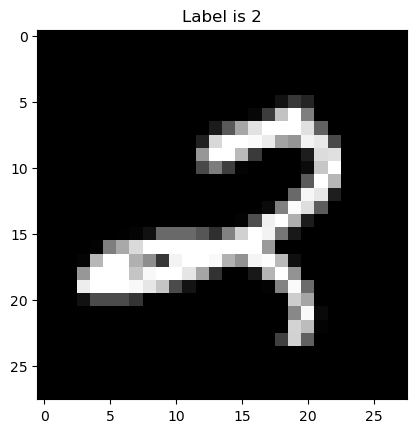

In [6]:
# Code inspired by:
# https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot
plt.title('Label is {label}'.format(label=labels[0]))
plt.imshow(images[0].reshape((28, 28)), cmap='gray')

# #2 - By default, the MNIST digits are grey scale. But we want them to be RGB.

Convert the MNIST digits to RGB. Hint: you want the arrays to go from (N, 28, 28) to (N, 28, 28, 3)

In [7]:
# Code inspired by:
# https://discuss.pytorch.org/t/grayscale-to-rgb-transform/18315
images_rgb = torch.stack([images, images, images], 4)
test_images_rgb = torch.stack([test_images, test_images, test_images], 4)

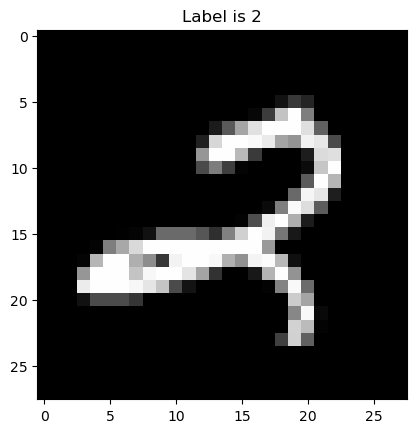

In [8]:
plt.title('Label is {label}'.format(label=labels[0]))
plt.imshow(images_rgb[0].reshape((28, 28, 3)), cmap='gray')

# #3 -  Write code that trains a fully connected neural network on your transformed MNIST data.
Your network should have 3 layers and use Tanh activations.
You should train for 5 epochs, each having at 1,000 training steps.
Plot the learning curve, which has a test set accuracy on the y-axis, and total training time on the x-axis.

Hint: Start from Question 1 and re-use the code. However, make sure to switch the loss from euclidean to cross entropy.

In [9]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

In [10]:
# Hyper-parameters
input_size = 2352
hidden_size = 500
num_classes = 10
num_epochs = 5
training_steps = 1000
learning_rate = 0.001

In [11]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
# Code inspired by:
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/feedforward_neural_network/main.py#L38
# Train the model
test_accuracy = []
for epoch in range(num_epochs):
    for i in range(training_steps):
        inputs = images_rgb.reshape(-1, 28*28*3)
        targets = labels
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, training_steps, loss.item()))
    
    # Evaluate model so far:
    with torch.no_grad():
        correct = 0
        total = 0
        inputs = test_images_rgb.reshape(-1, 28*28*3)
        targets = test_labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))
        test_accuracy.append(correct/total)

Epoch [1/5], Step [100/1000], Loss: 2.1136
Epoch [1/5], Step [200/1000], Loss: 1.9451
Epoch [1/5], Step [300/1000], Loss: 1.7944
Epoch [1/5], Step [400/1000], Loss: 1.6553
Epoch [1/5], Step [500/1000], Loss: 1.5258
Epoch [1/5], Step [600/1000], Loss: 1.4051
Epoch [1/5], Step [700/1000], Loss: 1.2932
Epoch [1/5], Step [800/1000], Loss: 1.1902
Epoch [1/5], Step [900/1000], Loss: 1.0958
Epoch [1/5], Step [1000/1000], Loss: 1.0100
Accuracy of the network on the 100 test images: 67.0 %
Epoch [2/5], Step [100/1000], Loss: 0.9321
Epoch [2/5], Step [200/1000], Loss: 0.8617
Epoch [2/5], Step [300/1000], Loss: 0.7982
Epoch [2/5], Step [400/1000], Loss: 0.7410
Epoch [2/5], Step [500/1000], Loss: 0.6893
Epoch [2/5], Step [600/1000], Loss: 0.6426
Epoch [2/5], Step [700/1000], Loss: 0.6004
Epoch [2/5], Step [800/1000], Loss: 0.5621
Epoch [2/5], Step [900/1000], Loss: 0.5272
Epoch [2/5], Step [1000/1000], Loss: 0.4955
Accuracy of the network on the 100 test images: 72.0 %
Epoch [3/5], Step [100/1000]

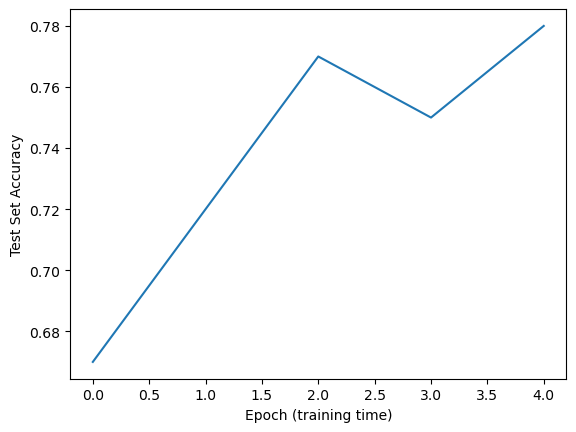

In [14]:
plt.xlabel('Epoch (training time)') 
plt.ylabel('Test Set Accuracy')
plt.plot(test_accuracy)

# #4 -   We want to see how robust our learned model is to pertubations.
Write code that transforms the background of MNIST digits from black to a randomly sampled RGB color. The random background color should be sampled each time you draw a digit. Include in your writeup your rendering of one of these modified MNIST digits.

After training a model on the standard MNIST digits, test this model using the colored MNIST digits. Show the learning curve for this model, which has the test accuracy of the colored digits on the y axis, and the total training time on the x-axis.

NOTE: You should never train your model on the colored digits. They are only for testing. This is called out of distribution robustness.

In [15]:
import copy

In [16]:
test_images_rgb_noise = copy.deepcopy(test_images_rgb)
for i in range(len(test_images_rgb)):
    bg_color = torch.rand(3)
    for j in range(len(test_images_rgb[i][0])):  
        for k in range(len(test_images_rgb[i][0][j])):
            pixel = test_images_rgb[i][0][j][k]
            if sum(pixel)==0:
                test_images_rgb_noise[i][0][j][k] = bg_color

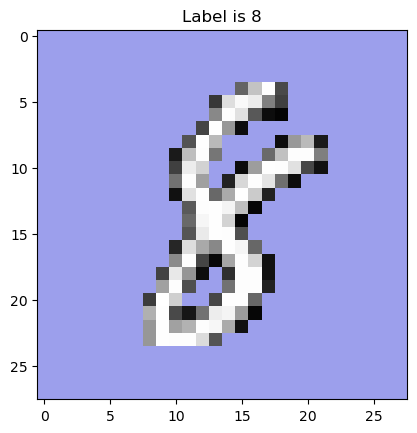

In [17]:
plt.title('Label is {label}'.format(label=test_labels[0]))
plt.imshow(test_images_rgb_noise[0].reshape((28, 28, 3)))

In [18]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [20]:
# Code inspired by:
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/feedforward_neural_network/main.py#L38
# Train the model
test_accuracy = []
for epoch in range(num_epochs):
    for i in range(training_steps):
        inputs = images_rgb.reshape(-1, 28*28*3)
        targets = labels
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, training_steps, loss.item()))
    
    # Evaluate model so far:
    with torch.no_grad():
        correct = 0
        total = 0
        inputs = test_images_rgb_noise.reshape(-1, 28*28*3)
        targets = test_labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))
        test_accuracy.append(correct/total)

Epoch [1/5], Step [100/1000], Loss: 2.1046
Epoch [1/5], Step [200/1000], Loss: 1.9400
Epoch [1/5], Step [300/1000], Loss: 1.7901
Epoch [1/5], Step [400/1000], Loss: 1.6507
Epoch [1/5], Step [500/1000], Loss: 1.5203
Epoch [1/5], Step [600/1000], Loss: 1.3988
Epoch [1/5], Step [700/1000], Loss: 1.2861
Epoch [1/5], Step [800/1000], Loss: 1.1824
Epoch [1/5], Step [900/1000], Loss: 1.0875
Epoch [1/5], Step [1000/1000], Loss: 1.0013
Accuracy of the network on the 100 test images: 22.0 %
Epoch [2/5], Step [100/1000], Loss: 0.9232
Epoch [2/5], Step [200/1000], Loss: 0.8527
Epoch [2/5], Step [300/1000], Loss: 0.7892
Epoch [2/5], Step [400/1000], Loss: 0.7319
Epoch [2/5], Step [500/1000], Loss: 0.6804
Epoch [2/5], Step [600/1000], Loss: 0.6338
Epoch [2/5], Step [700/1000], Loss: 0.5917
Epoch [2/5], Step [800/1000], Loss: 0.5536
Epoch [2/5], Step [900/1000], Loss: 0.5190
Epoch [2/5], Step [1000/1000], Loss: 0.4874
Accuracy of the network on the 100 test images: 27.0 %
Epoch [3/5], Step [100/1000]

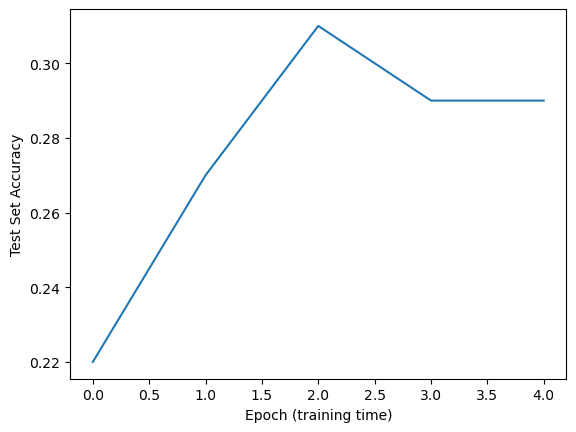

In [21]:
plt.xlabel('Epoch (training time)') 
plt.ylabel('Test Set Accuracy')
plt.plot(test_accuracy)

# #5 Increase the pertubations.

In addition to changing the background of the MNIST digit, also change the color of the digit itself. Again, randomly sample this digit color from RGB colors. Compare the convergence rate and final testing accuracy at convergence on vanilla MNIST, MNIST with modified backgrounds (from 4) and MNIST with modified digits and backgrounds (from 5)

In [22]:
test_images_rgb_noisier = copy.deepcopy(test_images_rgb)
for i in range(len(test_images_rgb)):
    bg_color = torch.rand(3)
    digit_color = torch.rand(3)
    for j in range(len(test_images_rgb[i][0])):  
        for k in range(len(test_images_rgb[i][0][j])):
            pixel = test_images_rgb[i][0][j][k]
            if sum(pixel)==0:
                test_images_rgb_noisier[i][0][j][k] = bg_color
            else:
                test_images_rgb_noisier[i][0][j][k] = digit_color

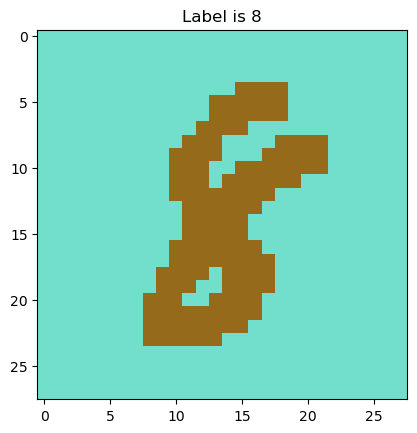

In [23]:
plt.title('Label is {label}'.format(label=test_labels[0]))
plt.imshow(test_images_rgb_noisier[0].reshape((28, 28, 3)))

In [24]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
# Code inspired by:
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/feedforward_neural_network/main.py#L38
# Train the model
test_accuracy = []
for epoch in range(num_epochs):
    for i in range(training_steps):
        inputs = images_rgb.reshape(-1, 28*28*3)
        targets = labels
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, training_steps, loss.item()))
    
    # Evaluate model so far:
    with torch.no_grad():
        correct = 0
        total = 0
        inputs = test_images_rgb_noisier.reshape(-1, 28*28*3)
        targets = test_labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))
        test_accuracy.append(correct/total)

Epoch [1/5], Step [100/1000], Loss: 2.1362
Epoch [1/5], Step [200/1000], Loss: 1.9681
Epoch [1/5], Step [300/1000], Loss: 1.8161
Epoch [1/5], Step [400/1000], Loss: 1.6752
Epoch [1/5], Step [500/1000], Loss: 1.5436
Epoch [1/5], Step [600/1000], Loss: 1.4206
Epoch [1/5], Step [700/1000], Loss: 1.3064
Epoch [1/5], Step [800/1000], Loss: 1.2009
Epoch [1/5], Step [900/1000], Loss: 1.1043
Epoch [1/5], Step [1000/1000], Loss: 1.0163
Accuracy of the network on the 100 test images: 15.0 %
Epoch [2/5], Step [100/1000], Loss: 0.9366
Epoch [2/5], Step [200/1000], Loss: 0.8647
Epoch [2/5], Step [300/1000], Loss: 0.7998
Epoch [2/5], Step [400/1000], Loss: 0.7415
Epoch [2/5], Step [500/1000], Loss: 0.6889
Epoch [2/5], Step [600/1000], Loss: 0.6415
Epoch [2/5], Step [700/1000], Loss: 0.5987
Epoch [2/5], Step [800/1000], Loss: 0.5599
Epoch [2/5], Step [900/1000], Loss: 0.5247
Epoch [2/5], Step [1000/1000], Loss: 0.4927
Accuracy of the network on the 100 test images: 17.0 %
Epoch [3/5], Step [100/1000]

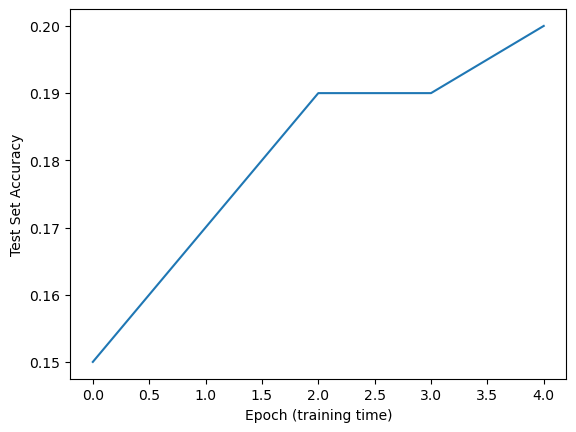

In [27]:
plt.xlabel('Epoch (training time)') 
plt.ylabel('Test Set Accuracy')
plt.plot(test_accuracy)

# #6 - Convolutional networks

Repeat step 5, only this time use a convolutional neural network with 2 layers rather than a fully connected network. Do the results differ?

In [137]:
# Convolutional neural network with 2 hidden layers:
# class NeuralNet2(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(NeuralNet2, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.tanh = nn.Tanh()
#         self.fc2 = nn.Linear(hidden_size, num_classes)

#     def forward(self, x):
#         out = self.fc1(x)
#         out = self.tanh(out)
#         out = self.tanh(out)
#         out = self.fc2(out)
#         return out

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, kernel=7):
        super(NeuralNet2, self).__init__()
        self.fc1 = nn.Conv2d(3, 10, kernel)
        self.fc2 = nn.Conv2d(10, 15, kernel)
        self.tanh = nn.Tanh()
        self.fc3 = nn.Linear(384000, num_classes)

    def forward(self, x):
        print(x.shape)
        out = self.fc1(x)
        out = self.tanh(out)
        print(out.shape)
        out = self.fc2(out)
        out = self.tanh(out)
        print(out.shape)
        out = self.tanh(out)
        print(out.shape)
        out = out.flatten()
        out = self.fc3(out)
        return out

In [138]:
model = NeuralNet2(input_size, hidden_size, num_classes).to(device)

In [139]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [140]:
images_rgb.shape

torch.Size([100, 1, 28, 28, 3])

In [141]:
# Code inspired by:
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/feedforward_neural_network/main.py#L38
# Train the model
test_accuracy = []
hidden_size = 10
for epoch in range(num_epochs):
    for i in range(training_steps):
        # inputs = images_rgb.reshape(-1, 28*28*3)
        inputs = images_rgb.reshape(100, 3, 28, 28)
        targets = labels
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, training_steps, loss.item()))
    
    # Evaluate model so far:
    with torch.no_grad():
        correct = 0
        total = 0
        inputs = test_images_rgb_noisier.reshape(-1, 28*28*3)
        targets = test_labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))
        test_accuracy.append(correct/total)

torch.Size([100, 3, 28, 28])
torch.Size([100, 10, 22, 22])
torch.Size([100, 15, 16, 16])
torch.Size([100, 15, 16, 16])


RuntimeError: size mismatch (got input: [10], target: [100])

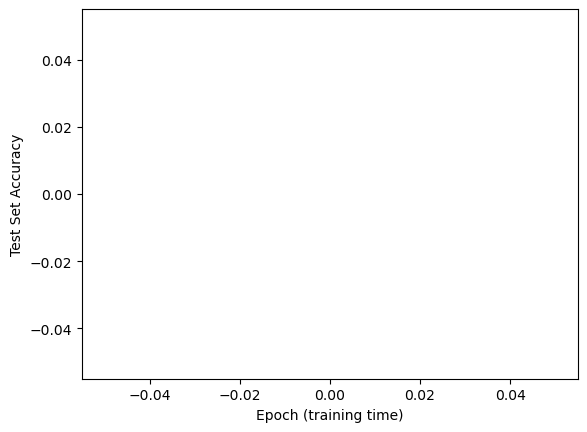

In [142]:
plt.xlabel('Epoch (training time)') 
plt.ylabel('Test Set Accuracy')
plt.plot(test_accuracy)

Questions 4-6 deal with something called data augmentation, which plays a key role in improving the robustness of several RL algorithms including Q-Learning. We will cover this much later in class.